In [1]:
#same aas exp 3,also positive,negative or neutral sentiment
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from tensorflow.keras.layers import Dense, Embedding, LSTM, Bidirectional, Dropout 
from tensorflow.keras.preprocessing.sequence import pad_sequences 

from tensorflow.keras.datasets import imdb

In [2]:
# Load the IMDB dataset
vocab_size = 10000  # Use the top 10,000 words in the dataset
max_length = 200  # Max length of each review
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=vocab_size)

In [3]:
# Pad sequences to ensure uniform input shape
x_train = pad_sequences(x_train, maxlen=max_length, padding='post', truncating='post')
x_test = pad_sequences(x_test, maxlen=max_length, padding='post', truncating='post')

In [4]:
# Build the deep neural network model
model =keras.Sequential([
    Embedding(vocab_size, 128, input_length=max_length),  # Embedding layer
    Bidirectional(LSTM(64, return_sequences=False)),  # Bidirectional LSTM for sequential data
    Dropout(0.3),  # Dropout for regularization
    Dense(64, activation='relu'),  # Dense layer applies activation function to inputs from prev layers
    Dropout(0.3),
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

C:\anaconda\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [5]:
# Compile the model
model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

In [15]:
history = model.fit(
    x_train, y_train, 
    epochs=2, 
    batch_size=32, 
    validation_split=0.2, 
    verbose=1
)

Epoch 1/2
625/625 ━━━━━━━━━━━━━━━━━━━━ 40s 65ms/step - accuracy: 0.9940 - loss: 0.0193 - val_accuracy: 0.8414 - val_loss: 0.8895
Epoch 2/2
625/625 ━━━━━━━━━━━━━━━━━━━━ 40s 64ms/step - accuracy: 0.9854 - loss: 0.0409 - val_accuracy: 0.8466 - val_loss: 1.0251


In [16]:
# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


782/782 ━━━━━━━━━━━━━━━━━━━━ 14s 17ms/step - accuracy: 0.8271 - loss: 1.1910
Test Accuracy: 82.83%


In [17]:
# Save the model
model.save("imdb_binary_classification_model.h5")


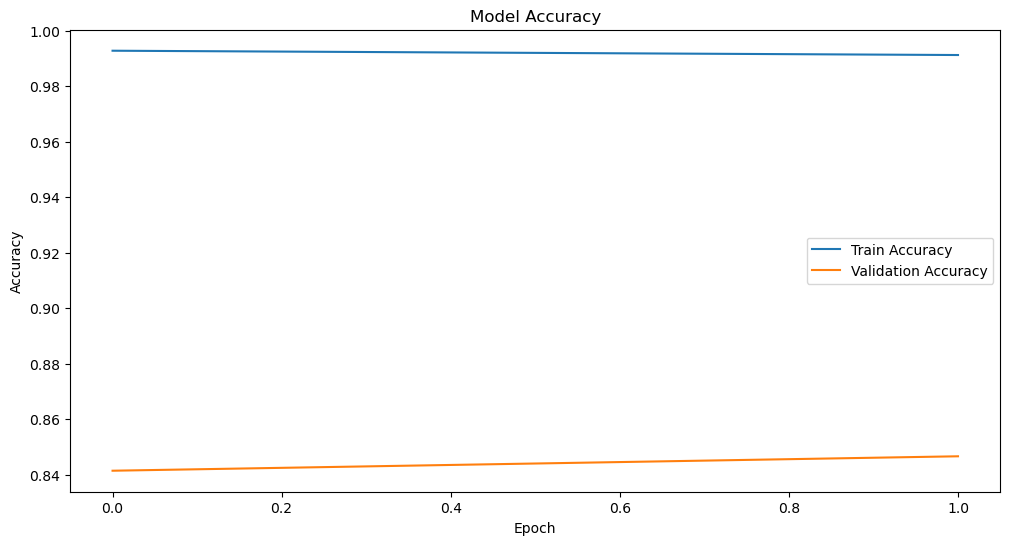

In [18]:
# Visualize training history
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
